# Histograms 

Histograms are used in data visualization to show the distribution of numerical data. Each bar in a histogram represents the frequency(the number of occurences) of data points within a specific range of values called a bin.

Histograms are particularly useful for understanding the shape of the data, such as whether the distribution is symmetric or skewed or if there are any outliers or unusual patters.

# Create a Histogram

To create a Histogram in matplotlib, use the [plt.hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function. This function requires at least one parameter `x`, which specifies the data values you wish to plot in the histogram. The `x` parameter can be a single array of values or a sequence of arrays if you wish to plot multiple datasets on the same histogram for comparison.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

# read Nvidia Share market data
nvidia = pd.read_csv("../data/NVDA.csv", parse_dates=["Date"])
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-19,39.227501,39.972500,39.035000,39.160000,38.855827,55189200
1,2019-02-20,39.455002,40.314999,39.342499,39.637501,39.329613,54098800
2,2019-02-21,39.764999,40.012501,38.794998,38.942501,38.640015,44854800
3,2019-02-22,39.465000,39.987499,39.327499,39.797501,39.488373,40174000
4,2019-02-25,40.639999,41.320000,39.584999,39.672501,39.364349,65602000


Let's create a histogram of `Adj Close` price column. 

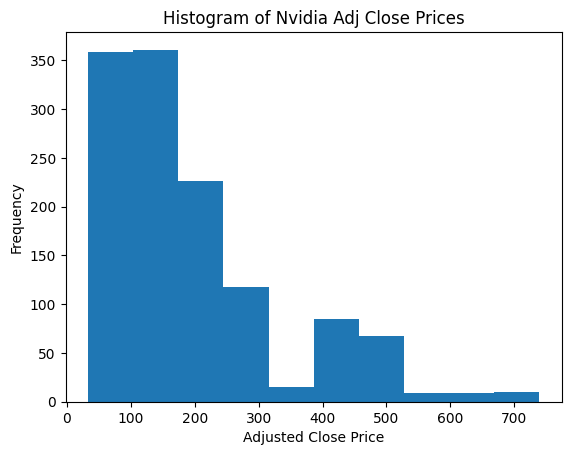

In [2]:
# create a histogram
plt.hist(nvidia["Adj Close"])
plt.title("Histogram of Nvidia Adj Close Prices")
plt.xlabel("Adjusted Close Price")
plt.ylabel("Frequency")
plt.savefig("../images/hist02.png")
plt.show()

The data is right-skewed, and most of the values are between \\$40 and \\$300. There is a long tail on the right. To get a better sense of the data, we can supplement the histogram with summary statistics, which can be calculated easily using the pandas describe method.

In [3]:
# summary statistics
nvidia['Adj Close'].describe()

count    1259.000000
mean      192.245246
std       141.305020
min        33.257328
25%        84.799519
50%       153.062927
75%       244.593521
max       739.000000
Name: Adj Close, dtype: float64

The minimum close price is \\$33, and the maximum is \\$739. The mean close price is around \\$192, and the median is \\$153.

## Bin Size

The `bins` parameter can be used to adjust the histogram's bin size. By default, the bin size is 10. Let's try bin sizes of 20 and 30.

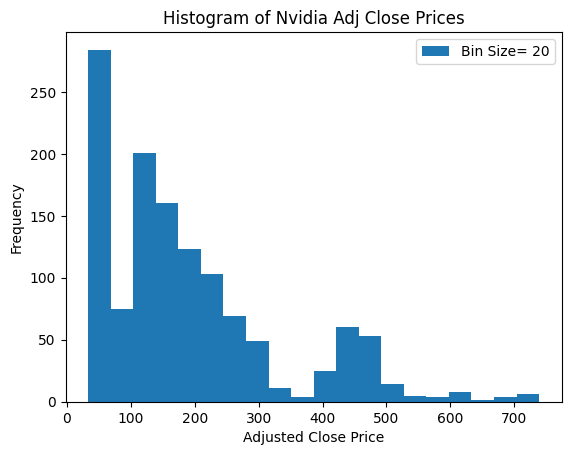

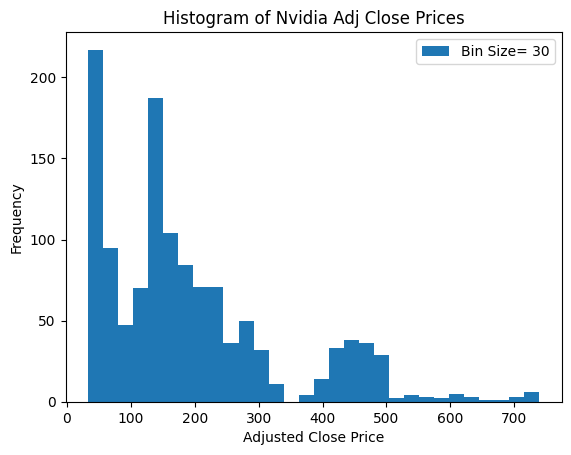

In [4]:
# histogram with custom bin size
for bin_size in [20, 30]:
    plt.hist(nvidia["Adj Close"], bins=bin_size, label=f"Bin Size= {bin_size}")
    plt.title("Histogram of Nvidia Adj Close Prices")
    plt.xlabel("Adjusted Close Price")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

## Color

We will use the `color` to change the color as usual. Since Nvidia's brand color is green, let's use that.

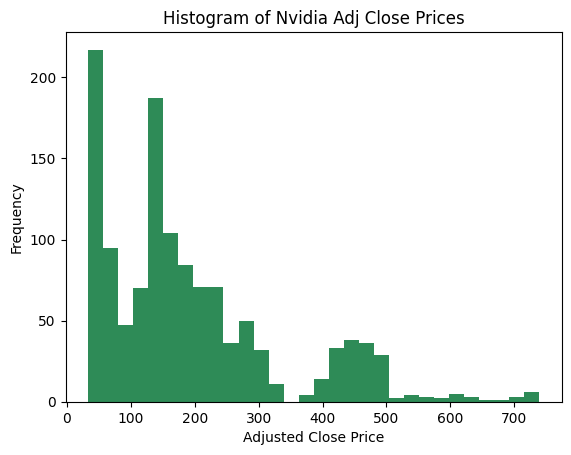

In [5]:
# histogram with custom color
plt.hist(nvidia['Adj Close'], color='seagreen', bins=30)
plt.title('Histogram of Nvidia Adj Close Prices')
plt.xlabel('Adjusted Close Price')
plt.ylabel('Frequency')
plt.savefig("../images/hist06.png")
plt.show()

## Multiple Histograms

You can also plot multiple histograms on the same figure. To illustrate this, let's read the data from the Framingham Heart study.

In [6]:
framingham = pd.read_csv('../data/framingham.csv')
framingham.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,Male,39,4.0,No,0.0,No,0,0,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,2.0,No,0.0,No,0,0,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,1.0,Yes,20.0,No,0,0,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,3.0,Yes,30.0,No,0,1,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes
4,Female,46,3.0,Yes,23.0,No,0,0,No,285.0,130.0,84.0,23.10,85.0,85.0,No


Now, Let's plot a histogram of Systolic blood pressure for males and females.

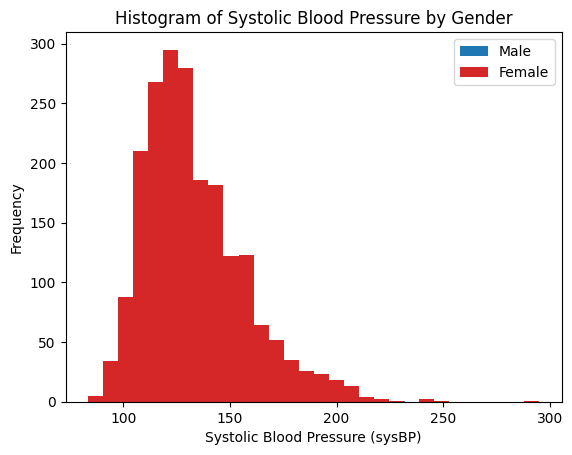

In [7]:
male_df = framingham[framingham["sex"] == "Male"]
female_df = framingham[framingham["sex"] == "Female"]

# Plot histograms for Systolic blood pressure for Male and Female
plt.hist(male_df["sysBP"], bins=30, label="Male", color="tab:blue")
plt.hist(female_df["sysBP"], bins=30, label="Female", color="tab:red")
plt.title("Histogram of Systolic Blood Pressure by Gender")
plt.xlabel("Systolic Blood Pressure (sysBP)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../images/hist07.png")
plt.show()

Although we plotted the histogram for males and females, the male data was hidden behind the females. We can solve this problem using several methods. A straightforward solution is to use the `alpha` to add transparency to the plot.

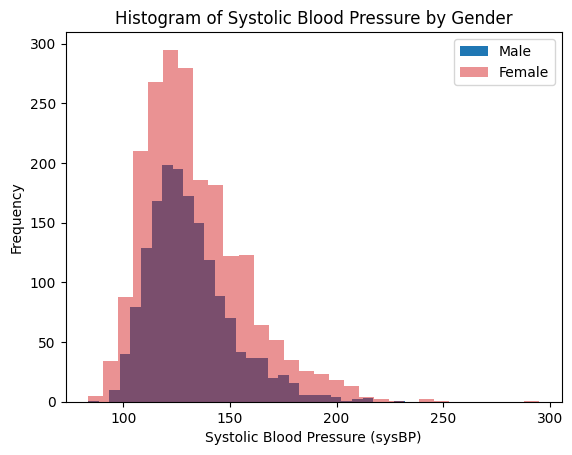

In [8]:
# histograms for Male and Female
plt.hist(male_df["sysBP"], bins=30, label="Male", color="tab:blue")

plt.hist(female_df["sysBP"], bins=30, alpha=0.5, label="Female", color="tab:red")

plt.title("Histogram of Systolic Blood Pressure by Gender")
plt.xlabel("Systolic Blood Pressure (sysBP)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../images/hist08.png")
plt.show()

## Histogram types

Another method for solving this problem is using the `histtype` in `plt.hist()`. Setting it to `step` will generate a line plot that is, by default, unfilled. The other histtype are bar(default), which is a traditional bar-type histogram, `barstacked`, where multiple data are stacked on top of each other; and `stepfilled`, which is another variation of the step, but by default, it is filled.

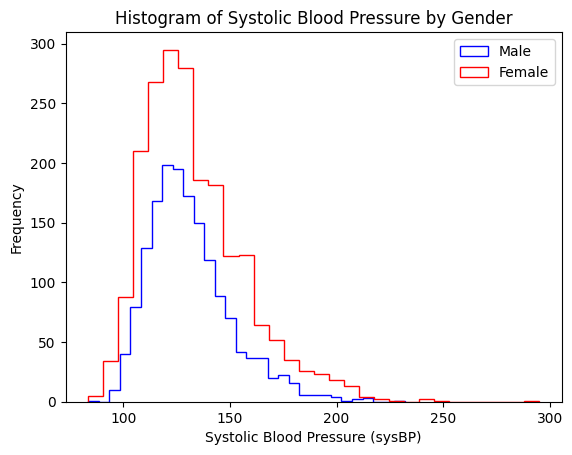

In [9]:
# histograms with step hist type
plt.hist(male_df["sysBP"], bins=30, histtype="step", label="Male", color="blue")

plt.hist(female_df["sysBP"], bins=30, histtype="step", label="Female", color="red")

plt.title("Histogram of Systolic Blood Pressure by Gender")
plt.xlabel("Systolic Blood Pressure (sysBP)")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../images/hist09.png")
plt.show()

## Density

The `plt.hist()` function also has a parameter called `density`, which plots the probability density instead of frequency. When `density=True`, the area under the curve becomes 1, which means that the height of each bar will show the probability of observations falling within each bin relative to the total dataset.

This is useful when comparing the shape of distributions rather than their absolute counts, especially when dealing with datasets of different sizes.

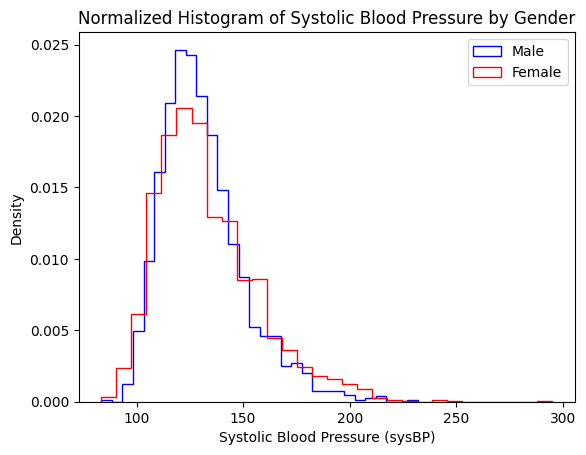

In [10]:
# histograms with density=True
plt.hist(
    male_df["sysBP"], bins=30, histtype="step", label="Male", color="blue", density=True
)

plt.hist(
    female_df["sysBP"],
    bins=30,
    histtype="step",
    label="Female",
    color="red",
    density=True,
)

plt.title("Normalized Histogram of Systolic Blood Pressure by Gender")
plt.xlabel("Systolic Blood Pressure (sysBP)")
plt.ylabel("Density")
plt.legend()
plt.savefig("../images/hist10.png")
plt.show()

## Orientation

The `orientation` in `plt.hist()` specifies the orientation of the histogram. By default, histogram are plotted vertically, but you can change it by setting `orientation='horizontal'`, which creates a Horizontal histogram.

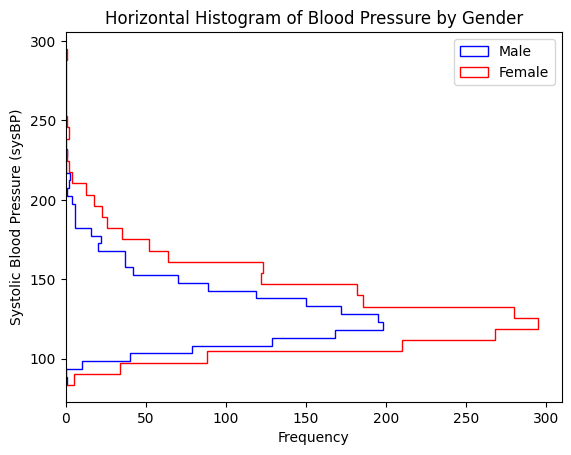

In [11]:
# Horizontal histogram
plt.hist(
    male_df["sysBP"],
    bins=30,
    histtype="step",
    label="Male",
    color="blue",
    orientation="horizontal",
)

plt.hist(
    female_df["sysBP"],
    bins=30,
    histtype="step",
    label="Female",
    color="red",
    orientation="horizontal",
)

plt.title("Horizontal Histogram of Blood Pressure by Gender")
plt.xlabel("Frequency")
plt.ylabel("Systolic Blood Pressure (sysBP)")
plt.legend()
plt.savefig("../images/hist11.png")
plt.show()

# 2D Histogram 

A 2D Histogram represents the joint distribution of two variables by dividing the plane into bins and counting the number of observations in each bin. It helps visualize the relationship between two numerical variables, similar to a scatter plot, but with a focus on the density of points.

To create a 2D Histogram in matplotlib, use the [plt.hist2d()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html#matplotlib.pyplot.hist2d) function. Let's make a 2D Histogram to visualize the relationship between systolic and diastolic blood pressure.

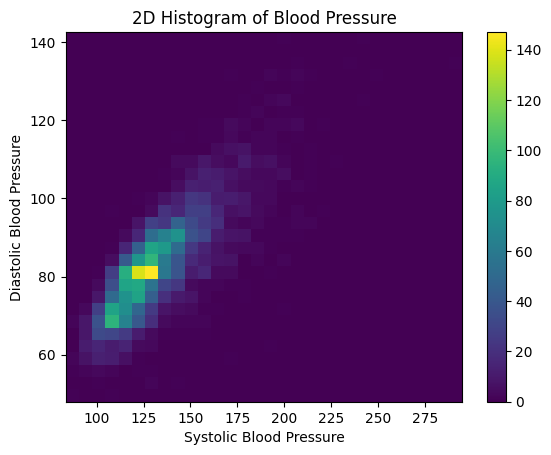

In [12]:
# 2D histogram of blood pressure
plt.hist2d(framingham['sysBP'], framingham['diaBP'], bins=30)
plt.colorbar() 
plt.title('2D Histogram of Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Diastolic Blood Pressure')
plt.savefig("../images/hist12.png")
plt.show()

## Exercise 5.1

1. Create a Histogram of `BMI`(Body Mass Index).
2. Create a Multiple Histogram of BMI based on Gender.
3. Apply various strategies to rectify the plot if there is too much overlap.
4. Create a density histogram of BMI.
5. Create a 2D histogram `BMI` and `totChol` (Total cholesterol).  

## Summary

- To create a histogram in Matplotlib use `plt.hist()` function.
- To change the bin size use the `bins` parameter.
- To change the color of the histogram use the `color` parameter.
- To create another histogram on the same plot add another `plt.hist()` function.
- Use the `alpha` parameter to add transparency to the histogram plot.
- Use the `histtype` parameter to create different types of histograms.
- Use `density` parameter to create a density histogram.
- The `orientation='horizontal'` parameter is used to create a horizontal histogram.
- To create a 2D histogram use the `plt.hist2d()` function.

## Solution 

### Exercise 5.1

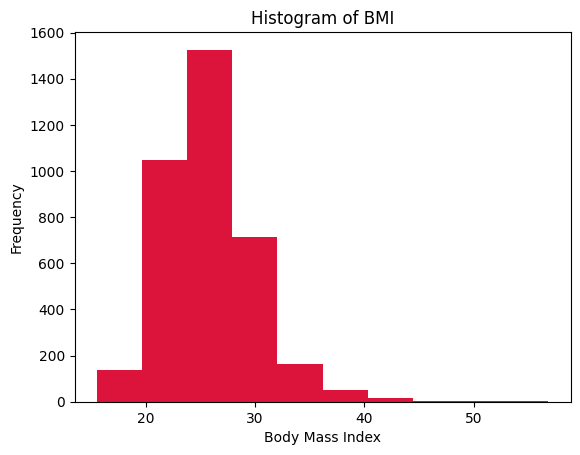

In [13]:
# Create a Histogram of BMI
plt.hist(framingham['BMI'], color='crimson')
plt.title('Histogram of BMI')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.savefig("../images/hist13.png")
plt.show()

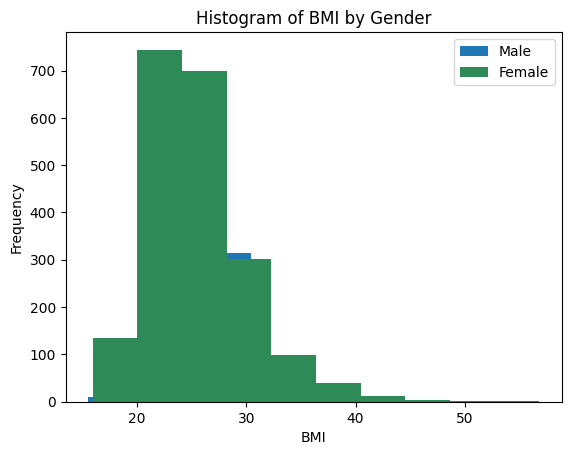

In [14]:
# Create a Multiple Histogram of BMI based on Gender.
male_df = framingham[framingham["sex"] == "Male"]
female_df = framingham[framingham["sex"] == "Female"]

plt.hist(male_df["BMI"], color="tab:blue", label="Male")
plt.hist(female_df["BMI"], color="seagreen", label="Female")
plt.title("Histogram of BMI by Gender")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../images/hist14.png")
plt.show()

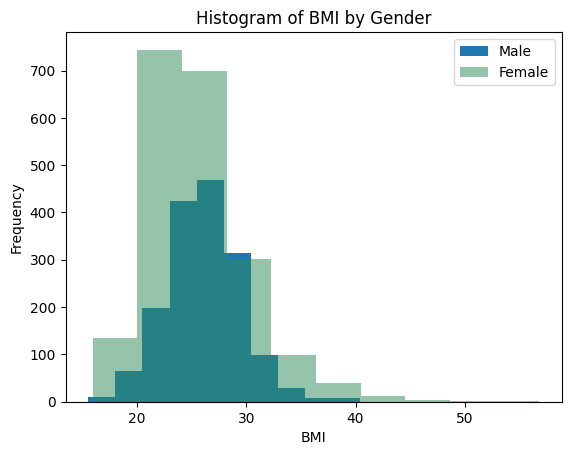

In [15]:
# Rectify the problem of overlapping by using alpha
plt.hist(male_df['BMI'], color='tab:blue', label='Male')
plt.hist(female_df['BMI'], color='seagreen', alpha=0.5, label='Female')
plt.title('Histogram of BMI by Gender')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.savefig("../images/hist15.png")
plt.show()

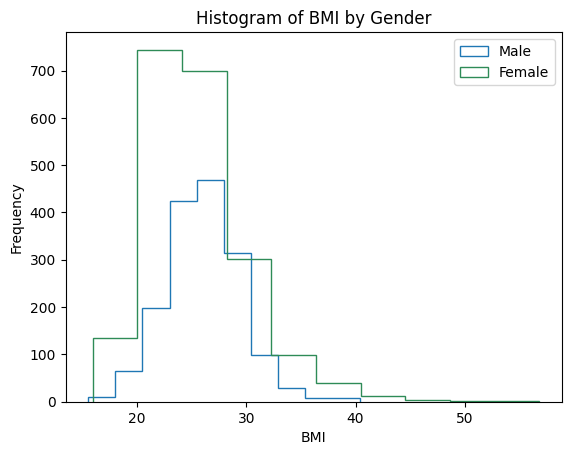

In [16]:
# Rectify overlapping by changing the histogram type
plt.hist(male_df["BMI"], color="tab:blue", histtype="step", label="Male")

plt.hist(female_df["BMI"], color="seagreen", histtype="step", label="Female")

plt.title("Histogram of BMI by Gender")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("../images/hist16.png")
plt.show()

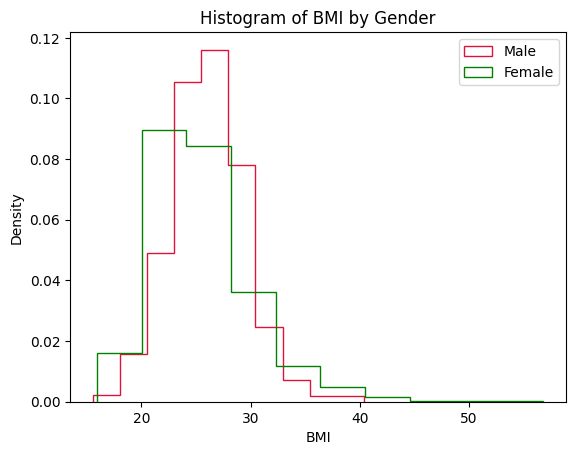

In [17]:

# Create a density histogram.
plt.hist(male_df["BMI"], color="crimson", density=True, histtype="step", label="Male")

plt.hist(female_df["BMI"], color="green", density=True, histtype="step", label="Female")

plt.title("Histogram of BMI by Gender")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.legend()
plt.savefig("../images/hist17.png")
plt.show()

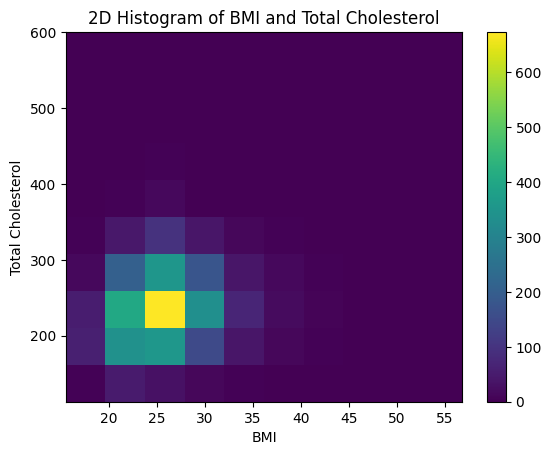

In [18]:
# 2D histogram of BMI and totChol 
plt.hist2d(framingham['BMI'], framingham['totChol'])
plt.colorbar()
plt.title('2D Histogram of BMI and Total Cholesterol')
plt.xlabel('BMI')
plt.ylabel('Total Cholesterol')
plt.savefig("../images/hist18.png")
plt.show()